In [7]:
import pandas as pd
import simplekml
import numpy as np

In [62]:
from datetime import datetime
from time import time

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw  =pd.read_csv("dataOut_14March18.csv", header=None, names=['Date','Time','Lat','Lon','GPS_Alt','Pressure','Pres_Alt','Temp','Batt'])

In [18]:
raw.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt
1,03/14/2018,08:17:34,45.015327,6.127997,1686.2,1.101200e+10,1706.225,17.9,3.957
2,03/14/2018,08:17:35,45.015331,6.127996,1685.9,1.101200e+10,1706.225,17.9,3.874
3,03/14/2018,08:17:36,45.015335,6.127997,1685.6,1.101200e+10,1706.127,17.9,3.874
4,03/14/2018,08:17:38,45.015339,6.127992,1685.6,1.101200e+10,1706.325,17.9,3.867
5,03/14/2018,08:17:39,45.015350,6.127990,1684.4,1.101200e+10,1706.225,17.9,3.874


In [19]:
raw.shape

(24067, 9)

In [17]:
#remove the first line if its text
raw=raw[1:]

In [20]:
raw['Lat_Delta']=raw.Lat[:-1] - raw.Lat[1:].values

/usr/local/lib/python2.7/dist-packages/pandas/core/computation/check.py:17: UserWarning: The installed version of numexpr 2.2.2 is not supported in pandas and will be not be used
The minimum supported version is 2.4.6

  ver=ver, min_ver=_MIN_NUMEXPR_VERSION), UserWarning)
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
raw['Lon_Delta']=raw.Lon[:-1] - raw.Lon[1:].values

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [85]:
data = raw[(raw.Lat_Delta > 0) | (raw.Lon_Delta >0)]

In [86]:
data.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt,Lat_Delta,Lon_Delta,Alt_Delta
1,03/14/2018,08:17:34,45.015327,6.127997,1686.2,1.101200e+10,1706.225,17.9,3.957,-0.000004,5.000000e-07,0.6
3,03/14/2018,08:17:36,45.015335,6.127997,1685.6,1.101200e+10,1706.127,17.9,3.874,-0.000004,5.200000e-06,0.0
4,03/14/2018,08:17:38,45.015339,6.127992,1685.6,1.101200e+10,1706.325,17.9,3.867,-0.000011,2.000000e-06,1.2
5,03/14/2018,08:17:39,45.015350,6.127990,1684.4,1.101200e+10,1706.225,17.9,3.874,-0.000016,2.300000e-06,0.8
6,03/14/2018,08:17:40,45.015366,6.127988,1683.6,1.101200e+10,1706.127,17.9,3.887,-0.000011,3.400000e-06,0.6


In [87]:
data.shape

(14798, 12)

In [101]:
data.dtypes

Date                   object
Time                   object
Lat                   float64
Lon                   float64
GPS_Alt               float64
Pressure              float64
Pres_Alt              float64
Temp                  float64
Batt                  float64
Lat_Delta             float64
Lon_Delta             float64
Alt_Delta             float64
DT             datetime64[ns]
Time_Delta    timedelta64[ns]
TD_s                  float64
Vert_Speed            float64
dtype: object

In [89]:
def make_dt(data):
    dt_str= data.Date+" "+data.Time[0:8]
    #return "'"+dt_str+"'"
    return datetime.strptime(dt_str,"%m/%d/%Y %H:%M:%S")

In [90]:
data['DT'] = data.apply(make_dt,axis=1)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [104]:
data.set_index('DT',inplace=True)

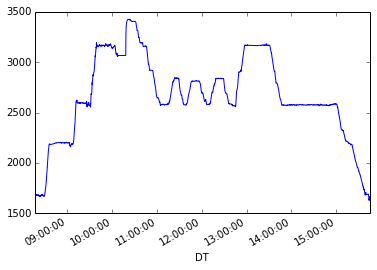

In [112]:
data.GPS_Alt.plot()

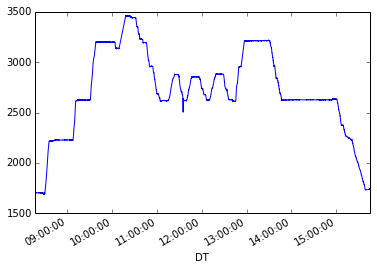

In [111]:
data.Pres_Alt.plot()

In [91]:
data.loc[:,'Alt_Delta']=data.GPS_Alt[:-1] - data.GPS_Alt[1:].values

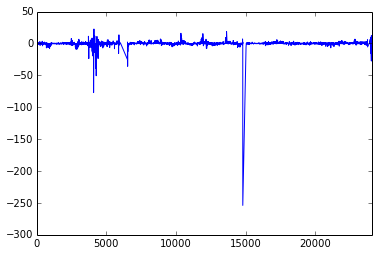

In [61]:
data.Alt_Delta.plot()

In [124]:
data.head()

,Date,Time,Lat,Lon,GPS_Alt,Pressure,Pres_Alt,Temp,Batt,Lat_Delta,Lon_Delta,Alt_Delta,Time_Delta,TD_s,Vert_Speed
DT,,,,,,,,,,,,,,,
2018-03-14 08:17:34,03/14/2018,08:17:34,45.015327,6.127997,1686.2,1.101200e+10,1706.225,17.9,3.957,-0.000004,5.000000e-07,0.6,NaT,NaN,NaN
2018-03-14 08:17:36,03/14/2018,08:17:36,45.015335,6.127997,1685.6,1.101200e+10,1706.127,17.9,3.874,-0.000004,5.200000e-06,0.0,0 days,2.0,0.0
2018-03-14 08:17:38,03/14/2018,08:17:38,45.015339,6.127992,1685.6,1.101200e+10,1706.325,17.9,3.867,-0.000011,2.000000e-06,1.2,0 days,2.0,0.6
2018-03-14 08:17:39,03/14/2018,08:17:39,45.015350,6.127990,1684.4,1.101200e+10,1706.225,17.9,3.874,-0.000016,2.300000e-06,0.8,0 days,1.0,0.8
2018-03-14 08:17:40,03/14/2018,08:17:40,45.015366,6.127988,1683.6,1.101200e+10,1706.127,17.9,3.887,-0.000011,3.400000e-06,0.6,0 days,1.0,0.6


In [106]:
data['TD_s']=data.index.to_series().diff().dt.seconds

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
data['Vert_Speed']=data.Alt_Delta / data.TD_s

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


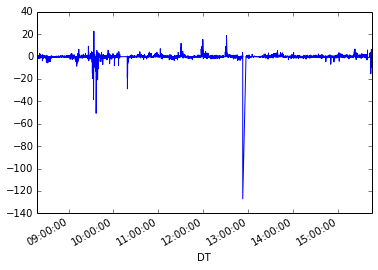

In [110]:
data.Vert_Speed.plot()

In [118]:
#remove negative infinite values
data = data[data.Vert_Speed!=-np.inf]

In [119]:
data.Vert_Speed.min()

-126.95000000000005

In [132]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource

In [133]:
output_file('ski.html')

In [125]:
line_data =ColumnDataSource(data)

In [134]:
p = figure()
p.line(x='DT', y='GPS_Alt', source=line_data)
show(p)